### Hello! Thank you for reviewing my project! Hope you have a gooood time!

# 0. Import libraries and Boston dataset

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import statsmodels.api as sm

In [10]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston=pd.read_csv(boston_url)

### By using describe() function in pandas, we can check basic statistics of the dataset

In [11]:
boston.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### By using info() function in pandas, we can check non-null counts of each columns and type of data

In [12]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


### If you want to see first 5 rows, then you can used head() function in pandas

In [13]:
boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### **Let's turn to the main tasks of this project now!**

# Task 4 : Generate Descriptive Statistics and Visualizations

### **Now, we need to visualize the Boston dataset! It is very helpful to understand the dataset. So, Let't dive into it!**

### Our specific task to do is like followings:
- For the "Median value of owner-occupied homes" provide a boxplot

- Provide a  bar plot for the Charles river variable

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

- Create a histogram for the pupil to teacher ratio variable

# Boxplot for "Median value of owner-occupied homes"

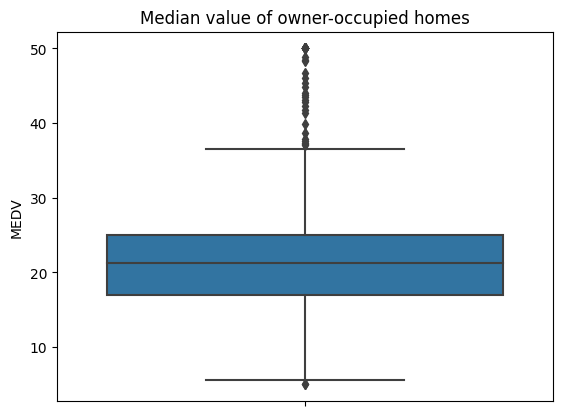

In [14]:
ax = sns.boxplot(y='MEDV', data=boston)
ax.set_title('Median value of owner-occupied homes')
plt.show()

# Bar plot for "the Charles river variable"

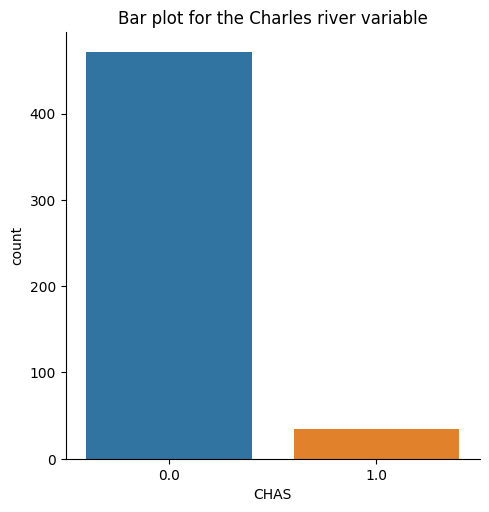

In [15]:
sns.catplot(x='CHAS', kind='count', data=boston)
plt.title('Bar plot for the Charles river variable')
plt.show()

# Boxplot for "the MEDV variable vs the AGE variable"

**First, we need to create new columns to divide the age groups. Let's check the age column first.**

In [18]:
boston['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

**Let's create the new columns "AGE_GROUP"**

In [20]:
boston["AGE_GROUP"]=0

**Then, by using simple loops, let's fill in the AGE_GROUP**

In [21]:
for i in boston.index:
    if boston.at[i, "AGE"] <= 35:
        boston.at[i, 'AGE_GROUP'] = 0
    elif boston.at[i, "AGE"] > 35:
        boston.at[i, 'AGE_GROUP'] = 1

In [22]:
for i in boston.index:
    if boston.at[i, "AGE"] >= 70:
        boston.at[i, 'AGE_GROUP'] = 2

**Let's check the loop works appropriately, then the unique data must be 0, 1 and 2**

In [33]:
print(boston['AGE_GROUP'].unique())

[1 2 0]


**Finally, let't visualize "AGE_GROUP" between "MEDV" by using Boxplot**

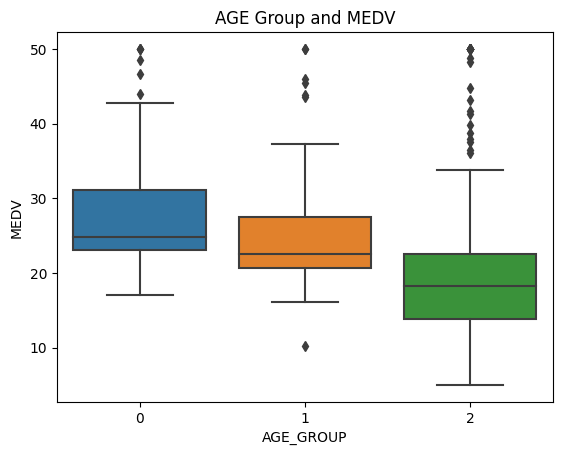

In [34]:
ax = sns.boxplot(x="AGE_GROUP", y="MEDV", data=boston)
ax.set_title('AGE Group and MEDV')
plt.show()

**AGE_GROUP 0 : under 35 years old**

**AGE_GROUP 1 : over 35 and under 70 years old**

**AGE_GROUP 2 : over 70 years old**

# Scatter plot to "show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town"
# What can you say about the relationship?

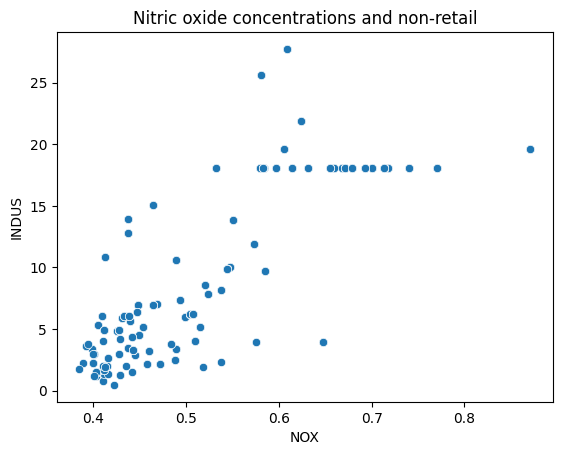

In [35]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston)
plt.title('Nitric oxide concentrations and non-retail')
plt.show()

# Analysis?

- The scatter plot suggests the presence of a moderate to high positive correlation between the INDUS variable and NOX variable, as the data appears to follow an upward trend.

- However, in order to obtain a more thorough understanding of the relationship between these variables, it is advisable to conduct a correlation test such as the Pearson correlation.

- This test will provide additional insights and confirm the strength and significance of the association between the INDUS and NOX variables.

- By performing the correlation test, a more detailed understanding of the relationship between these variables can be obtained.

# Histogram for "the pupil to teacher ratio variable"

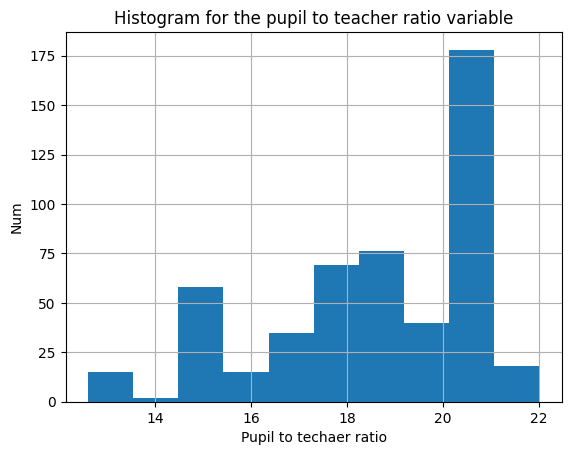

In [36]:
boston.hist(column = ['PTRATIO'])
plt.xlabel('Pupil to techaer ratio')
plt.ylabel('Num')
plt.title('Histogram for the pupil to teacher ratio variable')
plt.show()

# Task 5 : Use the appropriate tests to answer the questions provided.

# Instruction

**For each of the following questions;**

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Be sure to:**

- State your hypothesis.

- Use α = 0.05

- Perform the test Statistics.

- State the conclusion from the test.

### 1. Is there a significant difference in median value of houses bounded by the Charles river or not?

### Hypothesis:

- Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles river.
- Alternative Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles river.

In [52]:
from scipy.stats import ttest_ind

#Extract MEDV values for houses bounded and not bounded by the Charles river

bounded_by_charles = boston[boston['CHAS'] == 1]['MEDV']
not_bounded_by_charles = boston[boston['CHAS'] == 0]['MEDV']


In [55]:
#Perform independent t-test

t_statistic, p_value = ttest_ind(bounded_by_charles, not_bounded_by_charles)

In [56]:
#Compare p-value with significance level (alpha)

alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles river."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in the median value of houses bounded by the Charles river."

In [57]:
print(conclusion)

Reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles river.


### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

### Hypothesis:

- Null Hypothesis (H0): There is no difference in median values of houses for each proportion of owner-occupied units built prior to 1940.

- Alternative Hypothesis (H1): There is a difference in median values of houses for each proportion of owner-occupied units built prior to 1940.

In [58]:
from scipy.stats import f_oneway

#Group MEDV values based on AGE categories

age_groups = []
for age_category in boston['AGE_GROUP'].unique():
    age_groups.append(boston[boston['AGE_GROUP'] == age_category]['MEDV'])


In [59]:
#Perform one-way ANOVA

f_statistic, p_value = f_oneway(*age_groups)

In [60]:
#Compare p-value with significance level (alpha)

alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a difference in median values of houses for each proportion of owner-occupied units built prior to 1940."
else:
    conclusion = "Fail to reject the null hypothesis. There is no difference in median values of houses for each proportion of owner-occupied units built prior to 1940."

print(conclusion)

Reject the null hypothesis. There is a difference in median values of houses for each proportion of owner-occupied units built prior to 1940.


### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation))

### Hypothesis:

- Null Hypothesis (H0): There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
- Alternative Hypothesis (H1): There is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

In [61]:
from scipy.stats import pearsonr

#Extract NOX and INDUS values

nox = boston['NOX']
indus = boston['INDUS']


In [62]:
#Perform Pearson correlation

correlation, p_value = pearsonr(nox, indus)

In [65]:
print(scipy.stats.pearsonr(boston['NOX'], boston['INDUS']))

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)


In [63]:
#Compare p-value with significance level (alpha)

alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town."
else:
    conclusion = "Fail to reject the null hypothesis. There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town."

print(conclusion)

Reject the null hypothesis. There is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


### 4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [67]:
import statsmodels.api as sm

#Set up the dependent and independent variables

X = boston['DIS']  # Weighted distance to the five Boston employment centres
y = boston['MEDV']  # Median value of owner-occupied homes

In [68]:
#Add a constant term to the independent variable

X = sm.add_constant(X)

In [69]:
#Fit the linear regression model

model = sm.OLS(y, X).fit()

In [70]:
#Print the model summary

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        16:46:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

# Thank you for reviewing my project!

# This is end of the document!

# Hope this education helps you build a successful career.